# Finding Heavy Traffic Indicators on I-94

This project is to look at traffic data of I-94 to see if what factors effects traffic.  This data was provided by John Hogue and the data can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).  The dataset has data about temperature, weather, time and traffic volume.  I-94 goes from Saint Paul to Minneapolis and the data was recorded going westbound traffic only.
    
The goal of this project is to determine what variables contribute to heavy traffic.  Looking at temperature and weather to see how it affects traffic volume. This can be done by using graphs to help analyzing the data easier.  To do this Matplotlib will be used to show us the information.

In [1]:
# Reading in data
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Quick Exploration of data
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


After a quick exploration the data contains 5 numerical columns and 4 categorical columns. 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Traffic Volume')

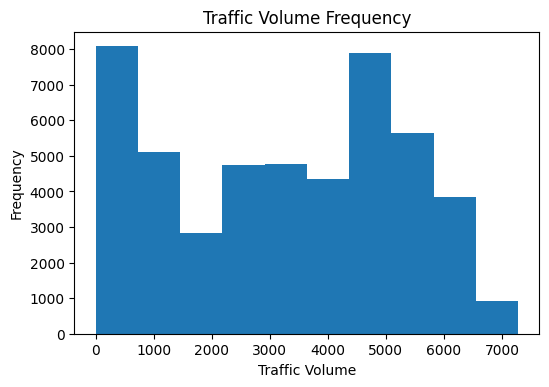

In [5]:
# Creating Bar Graph for Traffic Volume
traffic['traffic_volume'].plot.hist()
plt.title('Traffic Volume Frequency')
plt.xlabel('Traffic Volume')

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the histogram of Traffic Volume, it shows that their is a high count of traffic between 0-500 and 4500-5000. These value would will be typical during the night and day.

Looking into traffic between day and night will be the next step to get an understanding of heavy traffic and its indicators

## Traffic Volume: Day vs Night

When trying to get the day and night traffic volume, the date_time column will be used to seperated the data into day and night.

In [7]:
# Convertng object to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [8]:
# Getting day time traffic data between the hours of 7am and 7pm
daytime = traffic[traffic['date_time'].dt.hour.between(7,18)]

In [9]:
# Checking dataframe using Frequency table to make sure the hours are correct
daytime['date_time'].dt.hour.value_counts()

8     2080
7     2079
10    2078
9     2018
16    1988
18    1986
14    1969
12    1955
11    1952
15    1934
17    1933
13    1905
Name: date_time, dtype: int64

In [10]:
# Getting night time traffic data between the hours of 8pm to 6am
nighttime = traffic[(traffic['date_time'].dt.hour > 18) | (traffic['date_time'].dt.hour < 7)]

In [11]:
# Checking dataframe using Frequency table to make sure the hours are correct
nighttime['date_time'].dt.hour.value_counts()

4     2091
6     2087
5     2063
1     2049
23    2040
0     2037
3     2025
2     2019
22    1994
21    1982
20    1979
19    1961
Name: date_time, dtype: int64

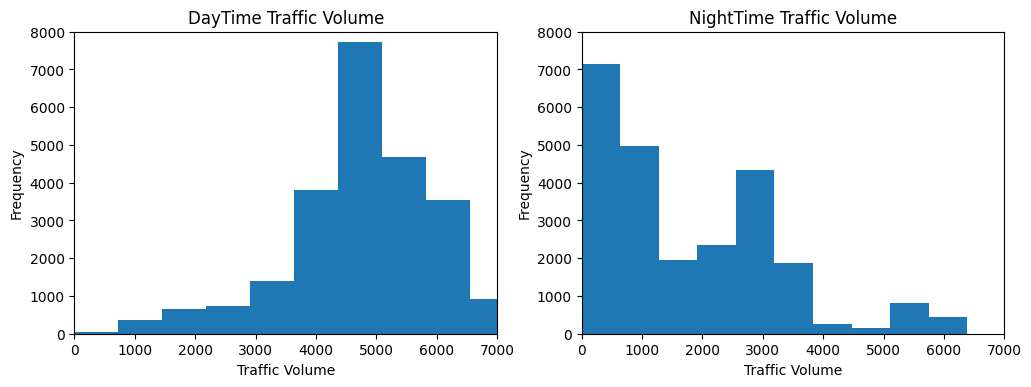

In [12]:
# Creating daytime and nighttime histograms for Traffic Volume
plt.figure(figsize=(12,4))

# Daytime histogram
plt.subplot(1,2,1)
daytime['traffic_volume'].plot.hist()
plt.title('DayTime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.xlim(0,7000)
plt.ylim(0,8000)

# Nighttime histogram
plt.subplot(1,2,2)
nighttime['traffic_volume'].plot.hist()
plt.title('NightTime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.xlim(0,7000)
plt.ylim(0,8000)
plt.show()

In [13]:
# Looking at Statistics of daytime traffic volume
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
# Looking at statistics of nighttime traffic volume
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime histogram has a left-skewed distribution with the highest traffic volume being between 4500-5000.  The nighttime histogram has a right-skewed distribution with the highest traffic volume being between 0-500.

Looking at these two graphs, the nighttime traffic is very light while daytime traffic is heavy.  We want to look into daytime traffic since the goal is to find heavy traffic indicators.

## DayTime Traffic Indicators

Looking into daytime traffic data, we can see how traffic volume during each month. We can also check how traffic volume is during the week and at each hour during the day.  This could help us by showing us when traffic is the heaviest.

In [15]:
# Creating column that contains the month for each instance
daytime['month'] = daytime['date_time'].dt.month

# Creating DataFrame grouping by month and getting mean for all numeric columns
month = daytime.groupby('month').mean()

# Checking the mean sum of each month for traffic volume
month['traffic_volume']

<ipython-input-15-d1e2f4a55d9b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

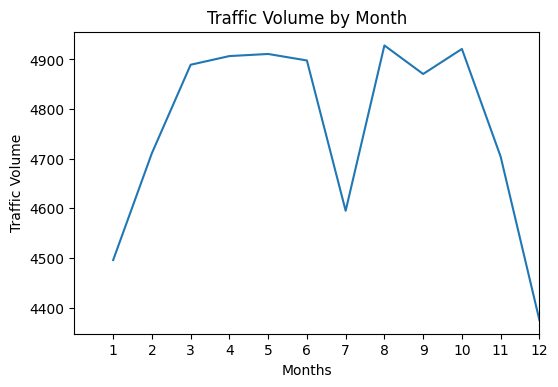

In [16]:
# Plotting Traffic Volume by Month
plt.figure()
plt.plot(month.index,month['traffic_volume'])
plt.title('Traffic Volume by Month')
plt.xlabel('Months')
plt.ylabel('Traffic Volume')
plt.xlim(0,12)
plt.xticks(ticks=month.index)
plt.show()

Looking at the line plot we can see that from January to March traffic increase from 4500 to 4900.  April through June traffic is constant at 4900 each month.  Then in July traffic drops quite a bit too 4600.  From August to October it picks back up too 4900 each month and falls back down in November and December.

Looking at the winter months which is they tend to have lower traffic. People tend to not go out when its cold and would rather stay in.  People are also taking the holidays off and spending time with family in which they are not traveling to work everyday, which lowers the amount of traffic on the road.  

Traffic is high from March to June and again from August to October.  These are the months that kids are in school and parents are working.  People are saving up to take time off in the summer or during the holidays.

In [17]:
# Creating day of the week column for daytime
daytime['day_of_week'] = daytime['date_time'].dt.dayofweek

# Creating DataFrame grouping by day of week and getting mean for all numeric columns
day = daytime.groupby('day_of_week').mean()

# Checking the mean sum of each day of the week for traffic volume
day['traffic_volume']

<ipython-input-17-384410941f8d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

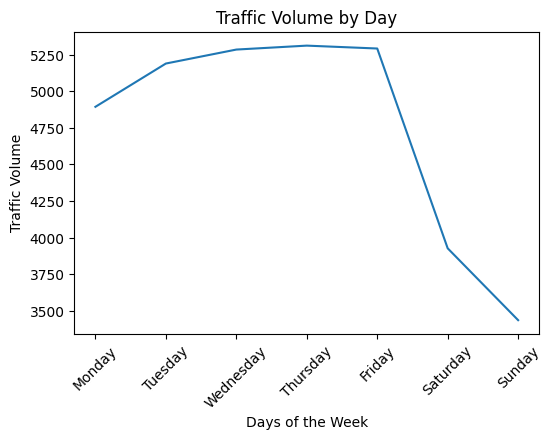

In [18]:
# Creating a list with name for each day of the week
day_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Ploting Traffic volume for each day of the week
plt.figure()
plt.plot(day.index,day['traffic_volume'])
plt.title('Traffic Volume by Day')
plt.xlabel('Days of the Week')
plt.ylabel('Traffic Volume')
plt.xticks(ticks=day.index,labels=day_labels,rotation=45)
plt.show()

Looking at the line plot we can see Monday through Friday traffic is very high.  Saturday and Sunday have very low traffic and this is due to most people work during the week and not on the weekend.  

We can seperate the weekday and weekend day to see traffic volume.  Traffic volume is much higher during the weekday then the weekend.

In [19]:
# Creating hour column in daytime
daytime['hour'] = daytime['date_time'].dt.hour

# Creating weekday and weekend dataframes
weekdays = daytime[daytime['day_of_week'] <= 4]
weekend = daytime[daytime['day_of_week'] >= 5]

# Creating dataframe grouped by hour and getting mean for all numeric columns
hour_weekdays = weekdays.groupby('hour').mean()
hour_weekend = weekend.groupby('hour').mean()

<ipython-input-19-7e062e38a652>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# Checking the mean sum for each hour during the weekday
hour_weekdays['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [21]:
# Checking the mean sum for each hour during the weekend
hour_weekend['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

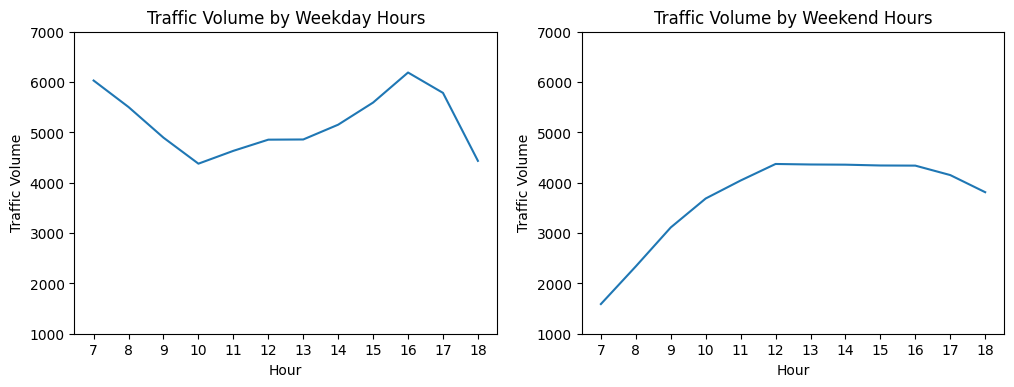

In [22]:
# Creating side-by-side line plots of weekday and weekend hours
plt.figure(figsize=(12,4))

# Creating weekday hours line plot
plt.subplot(1,2,1)
plt.plot(hour_weekdays.index,hour_weekdays['traffic_volume'])
plt.title('Traffic Volume by Weekday Hours')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xticks(ticks=hour_weekdays.index)
plt.ylim(1000, 7000)                    # Setting common y-axis scale

# Creating weekend hours line plot
plt.subplot(1,2,2)
plt.plot(hour_weekend.index,hour_weekend['traffic_volume'])
plt.title('Traffic Volume by Weekend Hours')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xticks(ticks=hour_weekend.index)
plt.ylim(1000, 7000)                    # Setting common y-axis scale
plt.show()

Looking at the weekday traffic we can see that at 7am and 4pm, traffic is the heaviest.  During the weekend traffic is the heaviest between 12pm and 4pm.

The hours for weekdays is high at those times because everyone is going to work at 7am and going home at 4pm.  During the weekend traffic its highest is when people are going out for the weekend.

## Weather Effects on Traffic

Now we are going to take a look at how weather effects traffic.  We are going to start by looking at the correlation.

In [23]:
# Using correlation function on traffic volume 
daytime.corr()[['traffic_volume']]

,traffic_volume
temp,0.128317
rain_1h,0.003697
snow_1h,0.001265
clouds_all,-0.032932
traffic_volume,1.000000
month,-0.022337
day_of_week,-0.416453
hour,0.172704


Looking at the correlation between traffic volume and weather, their isn't a strong correlation between any of them.  The strongest would be between day of week and traffic volume.  We can use a scatter plot to see how they correlate.

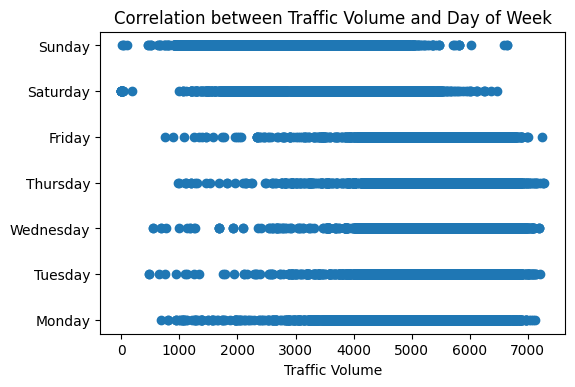

In [24]:
# Creating Scatter plot between traffic volume and temp
plt.scatter(daytime['traffic_volume'],daytime['day_of_week'])
plt.title('Correlation between Traffic Volume and Day of Week')
plt.xlabel('Traffic Volume')
plt.yticks(ticks=day.index,labels=day_labels)
plt.show()

Looking at the scatter plot the we can see that each day has a range of traffic volume.  Its hard to get anything useful out of this graph.

Now lets look at the weather_main and weather_description columns to see if we can find anything useful.

In [25]:
# Creating DataFrames grouped by weather_main and weather_description
weather_main = daytime.groupby('weather_main').mean()
weather_description = daytime.groupby('weather_description').mean()

In [26]:
# Checking mean sum of traffic volume from weather_main
weather_main['traffic_volume']

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64

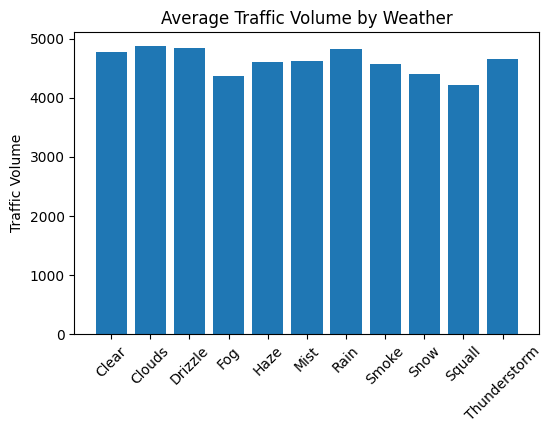

In [27]:
# Creating bar graph for Traffic Volume in weather_main
plt.bar(weather_main.index,weather_main['traffic_volume'])
plt.title('Average Traffic Volume by Weather')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.show()

Looking at this we can see when it cloudy, drizzling and raining have the highest traffic volume. 

In [28]:
# Checking mean sum of traffic volume from weather_description
weather_description['traffic_volume']

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light intensity shower rain            4558.100000
light rain                             4859.650849
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4430.858896
mist                                   4623.976475
moderate rain                          4769.643312
overcast cl

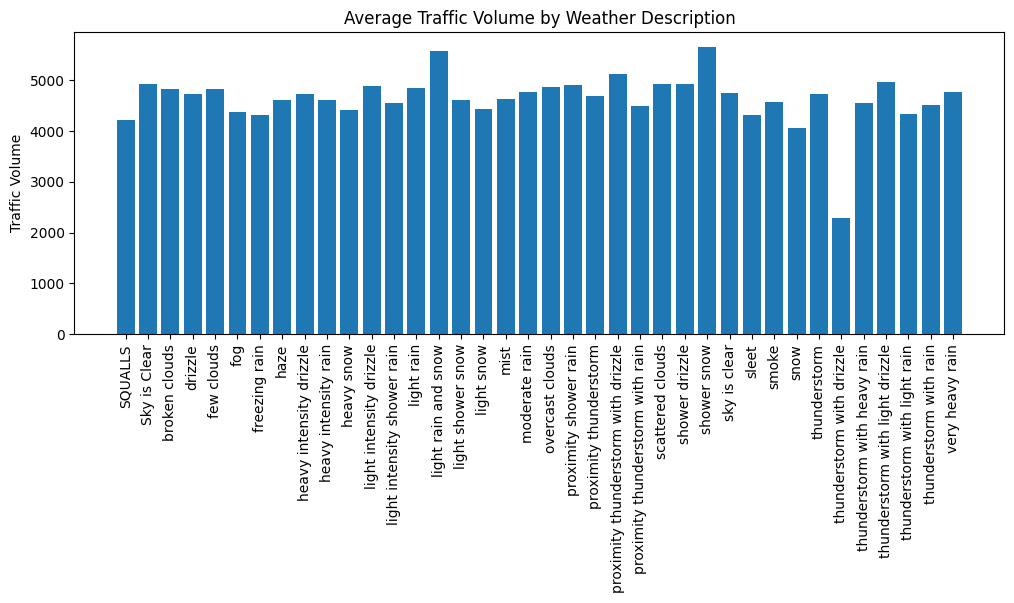

In [29]:
# Creating bar graph for Traffic Volume in weather_description
plt.figure(figsize=(12,4))
plt.bar(weather_description.index,weather_description['traffic_volume'])
plt.title('Average Traffic Volume by Weather Description')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=90)
plt.show()

Looking at the average mean we can see that shower snow, proximity thunderstorm with drizzle and light rain and snow have high traffic volume of over 5000.   

## Conclusion

In this project we wanted to find traffic indicators that cause heavy traffic.  We found that traffic tend to be heavier when the months are warm compared to cold.  When looking at the week we see that during the weekday its a lot heavier compared to the weekend.  During the weekday traffic is its heaviest at 7am and 4pm.  The biggest weather indicators for traffic volume was cloudy, rain and drizzle. When looking closer at the weather descriptions its shower snow, proximity thunderstorm with drizzle and light rain and snow that affect traffic the most. These are the indicators found when it comes to what causes heavy traffic.